<a href="https://colab.research.google.com/github/m-ritam/OIBSIP/blob/main/Sales_prediction_using_python_Ritam_Maji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
sales_data= pd.read_csv("/content/drive/MyDrive/Oasis Info/sales prediction/Advertising.csv")
sales_data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
sales_data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
sales_data.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
sales_data.shape

(200, 5)

In [6]:
sales_data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
sales_data.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [8]:
sales_data.size

1000

In [9]:
sales_data.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

BAR GRAPH OF TV SALES:


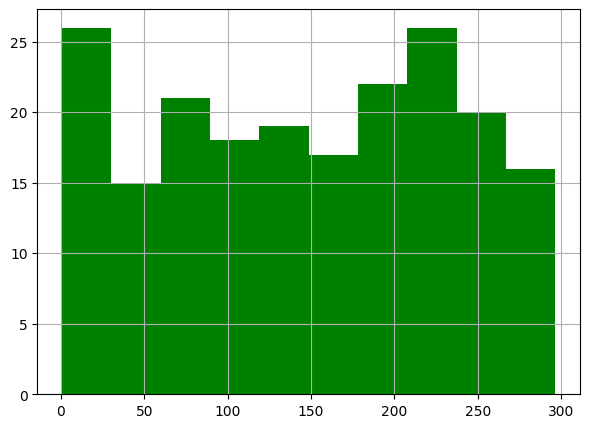

In [10]:
print("BAR GRAPH OF TV SALES:")
sales_data["TV"].hist(color="green",figsize=(7,5))
plt.show()

BAR GRAPH OF RADIO SALES:


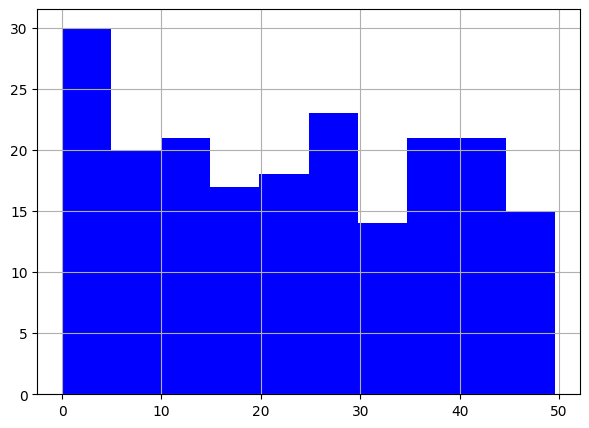

In [11]:
print("BAR GRAPH OF RADIO SALES:")
sales_data["Radio"].hist(color="blue",figsize=(7,5))
plt.show()

BAR GRAPH OF Newspaper SALES:


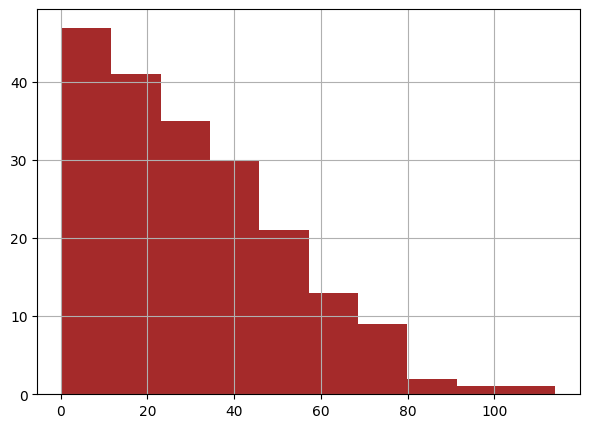

In [12]:
print("BAR GRAPH OF Newspaper SALES:")
sales_data["Newspaper"].hist(color="brown",figsize=(7,5))
plt.show()

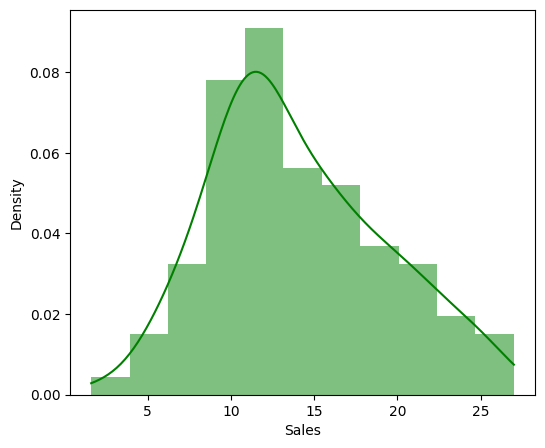

In [13]:
plt.figure(figsize=(6,5))
sea.histplot(sales_data['Sales'], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

In [14]:
#DATA MODELLING
x =np.array(sales_data.drop(labels=['Sales'], axis=1))

In [15]:
y =np.array(sales_data['Sales'])

In [16]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state = 45)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)

Shape of x_train (160, 4)
Shape of y_train (160,)


In [17]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [18]:
coefficient = reg.coef_
coefficient

array([-0.00202696,  0.04712224,  0.18277083, -0.00554797])

In [19]:
intercept = reg.intercept_
intercept

3.2093049125748365

In [20]:
#TESTING THE MODEL
pred = reg.predict(x_test)
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,predicted_sales
0,14.9,15.304751
1,8.8,10.248574
2,16.6,16.568926
3,23.8,21.879357
4,12.0,16.076553
5,9.7,9.124459
6,19.0,18.016036
7,11.8,11.401521
8,18.5,17.564095
9,8.5,8.757843


In [21]:
ma = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {ma:.2f}')

Mean absolute error: 1.10


In [22]:
ms = mean_squared_error(y_test, pred)
print(f'Mean squared error: {ms:.2f}')

Mean squared error: 2.34


In [23]:
rm = np.sqrt(ms)
print(f'Root mean squared error: {rm:.2f}')

Root mean squared error: 1.53
